In [221]:
import pandas as pd
import numpy as np

In [222]:
df1=pd.read_csv(r"C:\Users\HP1\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2=pd.read_csv(r"C:\Users\HP1\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3=pd.read_csv(r"C:\Users\HP1\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4=pd.read_csv(r"C:\Users\HP1\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5=pd.read_csv(r"C:\Users\HP1\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")



In [223]:
df=pd.concat([df1,df2,df3,df4,df5])
df.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [224]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [225]:
#removing remaining lease bcoz there is lots of null values
df=df.drop(["remaining_lease"],axis=1)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 911362 entries, 0 to 165158
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                911362 non-null  object 
 1   town                 911362 non-null  object 
 2   flat_type            911362 non-null  object 
 3   block                911362 non-null  object 
 4   street_name          911362 non-null  object 
 5   storey_range         911362 non-null  object 
 6   floor_area_sqm       911362 non-null  float64
 7   flat_model           911362 non-null  object 
 8   lease_commence_date  911362 non-null  int64  
 9   resale_price         911362 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 76.5+ MB


In [227]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [228]:
df.nunique()

month                   407
town                     27
flat_type                 8
block                  2690
street_name             582
storey_range             25
floor_area_sqm          210
flat_model               34
lease_commence_date      56
resale_price           9312
dtype: int64

In [230]:
df["year"]=df["month"].apply(lambda x:(x[0:4]))                   #extracted year
df["months"]=df["month"].apply(lambda x:(x[5:7]))                   #extracted month


In [231]:
df["months"]=df["months"].astype('int64')
df["year"]=df["year"].astype("int64")

In [232]:
df=df.drop(['month'],axis=1)                          #dropping the original column after extracting year and month

In [233]:
df.select_dtypes(["object"]).columns

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model'],
      dtype='object')

In [234]:
town=[]
for i in (df["town"].unique()):
    town.append(i)
print(town)

['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN', 'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS', 'PUNGGOL']


In [235]:
flat_type=[]
for i in (df["flat_type"].unique()):
    flat_type.append(i)
print(flat_type)

['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', 'MULTI GENERATION', 'MULTI-GENERATION']


In [236]:
storey_range=[]
for i in (df["storey_range"].unique()):
    storey_range.append(i)
print(storey_range)

['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15', '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30', '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10', '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30', '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51']


In [237]:
flat_model=[]
for i in (df["flat_model"].unique()):
    flat_model.append(i)
print(flat_model)
print(len(flat_model))

['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED', 'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE', '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION', 'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A', 'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette', 'Maisonette', 'Multi Generation', 'Adjoined flat', 'Premium Apartment', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1', 'Type S2', 'Premium Apartment Loft', '3Gen']
34


In [238]:
df=df.drop(['block','street_name'],axis=1)

In [239]:
#replacing the values that are type incorrectly
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Improved","IMPROVED"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("New Generation","NEW GENERATION"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Model A","MODEL A"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Standard","STANDARD"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Apartment","APARTMENT"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Simplified","SIMPLIFIED"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Maisonette","MAISONETTE"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Multi Generation","MULTI GENERATION"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Premium Apartment","PREMIUM APARTMENT"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Terrace","TERRACE"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("Improved-Maisonette","IMPROVED-MAISONETTE"))
df["flat_model"]=df["flat_model"].apply(lambda x:x.replace("2-room","2-ROOM"))


In [240]:
flat_model=df["flat_model"].unique()
print(len(flat_model))

22


In [179]:
#converting to csv file to use it later
df.to_csv("singapore.csv",index=False)

In [241]:
#encoding the categorical column
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
df["storey_range"]=encoder.fit_transform(df[["storey_range"]])
df["flat_type"]=encoder.fit_transform(df[["flat_type"]])

In [243]:
#for finding out the correlation between the features var and target var
df1=df.iloc[:,[1,2,3,5,6,7,8]]

<Axes: >

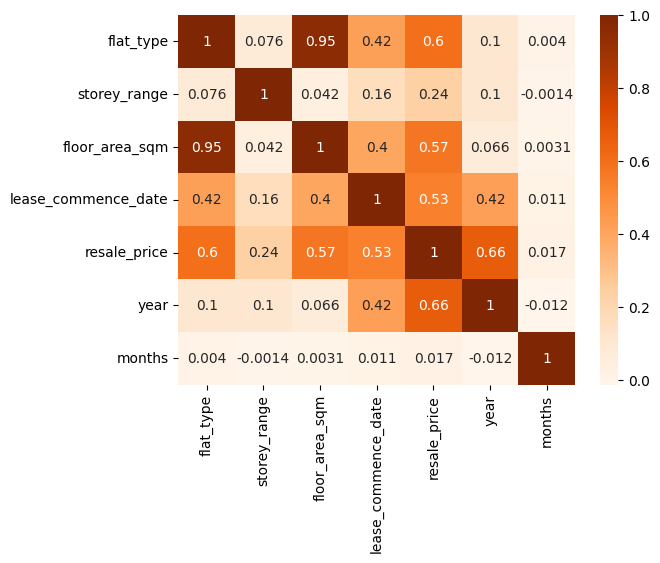

In [245]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True,cmap="Oranges")

In [246]:
#checking the skewness
from scipy import stats
df1.skew()

flat_type              0.401763
storey_range           1.091370
floor_area_sqm         0.367871
lease_commence_date    0.623377
resale_price           0.920487
year                   0.296607
months                -0.041267
dtype: float64

In [247]:
#encoding the categorical column flat model and town
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe1=ohe.fit_transform(df[["town"]]).toarray()
ohe2=ohe.fit_transform(df[["flat_model"]]).toarray()


In [248]:
x=(df[["storey_range","floor_area_sqm","lease_commence_date","year"]])

In [250]:
#independent features
X=np.concatenate((x[["storey_range","floor_area_sqm","lease_commence_date","year"]].values,ohe1,ohe2),axis=1)

In [251]:
#target variable
y=df["resale_price"]

In [252]:
#scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [253]:
#splitting the data into training and testing 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=5)


In [254]:
#Fitting the regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:",r2_score(y_test,y_pred))
print(f'RMSE: {mean_squared_error(y_test,y_pred, squared=False):.2f}')


Training Accuracy: 0.8306749085092139
Testing Accuracy: 0.8295006568642647
RMSE: 68593.14


In [255]:
#cross validating the linear regression model
from sklearn.model_selection import cross_val_score
print(cross_val_score(model,X_train,y_train,cv=10))

[0.83007277 0.82949255 0.83288059 0.82987283 0.8300208  0.83152178
 0.83070564 0.82789301 0.83106723 0.83281676]


In [256]:
#Fitting the Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
print(f'R^2 of model: {dtr.score(X_train, y_train):.3f}')
pred = dtr.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test, pred, squared=False):.2f}')
print(f'R^2 of predictions: {r2_score(y_test, pred):.3f}')

R^2 of model: 0.991
RMSE: 30401.70
R^2 of predictions: 0.967


In [257]:
#cross validating the decision tree regression model
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtr,X_train,y_train,cv=10))

[0.96557384 0.96469337 0.96571449 0.96548187 0.965197   0.96642802
 0.96584789 0.96533149 0.96556723 0.96638543]
